## Sales Data Analysis as a Data Analyst Intern at MERISKILL

#### Import necessary libraries

In [161]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

import datetime 
from datetime import datetime 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [76]:
import os

In [77]:
os.getcwd()

'C:\\Users\\Tamirat\\Desktop\\Data Analysis Projects\\Project 1'

Let's read the data. 

In [143]:
df = pd.read_csv('Sales_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [92]:
df.shape

(186850, 6)

**The original raw data contains 186850 raws and  6 raws**

In [93]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**The data types must be changed as follows:**
- Quantity Ordered  and Price Each          ----> numeric
- Order Date          ---------------------------->date

In [144]:
df['Price Each']=pd.to_numeric(df['Price Each'], errors='coerce')
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [96]:
#checking the change
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

**At this point the data conversion is done**

**All columns are important for our analysis. So let we check if we have nulls in any of the columns**

In [97]:
#check for null values
df1=df[df.isnull().any(axis=1)]
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaT,NaN
356,NaN,NaN,NaN,NaN,NaT,NaN
519,Order ID,Product,NaN,NaN,NaT,Purchase Address
735,NaN,NaN,NaN,NaN,NaT,NaN
1149,Order ID,Product,NaN,NaN,NaT,Purchase Address
...,...,...,...,...,...,...
186548,NaN,NaN,NaN,NaN,NaT,NaN
186563,Order ID,Product,NaN,NaN,NaT,Purchase Address
186632,Order ID,Product,NaN,NaN,NaT,Purchase Address
186738,Order ID,Product,NaN,NaN,NaT,Purchase Address


**As shown above, there are 900 rows with null values. Let's drop them as we need values in these columns for our feature tasks.** 

In [145]:
#Drop the rows with nulls
df.dropna(inplace=True)

#check if all rows with nulls are dropped.
raw_nulls=df[df.isnull().any(axis=1)]
raw_nulls

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**As shown above, now we have zero rows with null content**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [100]:
df.describe()

,Quantity Ordered,Price Each,Order Date
count,185950.000000,185950.000000,185950
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464
min,1.000000,2.990000,2019-01-01 03:07:00
25%,1.000000,11.950000,2019-04-16 21:05:15
50%,1.000000,14.950000,2019-07-17 20:40:30
75%,1.000000,150.000000,2019-10-26 08:14:00
max,9.000000,1700.000000,2020-01-01 05:13:00
std,0.442793,332.731330,NaN


**As displayed by the above two summary informations:** 
- The data has no null values in all columns and no negative or too extreme values in the numeric columns

- The cleaned data has 185950 rows and  6 columns

In [146]:
#convert data type of 'Quantity Ordered' to integer
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')

### enriching data with additional columns

#### Create new 'Month','Day','Hour' and 'Sales' columns for further analysis

In [148]:
df['Month'] = df['Order Date'].dt.month    
df['Day'] = df['Order Date'].dt.day 
df['Hour'] = df['Order Date'].dt.hour 
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [149]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,22,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,9,11.99


#### Add a 'City' and 'State' columns

In [151]:
# Let's use the .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return (address.split(',')[2]).split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))
df['State'] = df['Purchase Address'].apply(lambda x: get_state(x))
       

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,22,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,9,11.99,Los Angeles,CA


### Question 1: What were the best and worst months for sales? How much was earned that month? 

In [152]:
Total_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False) 
Total_sales

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

Let's plot this!

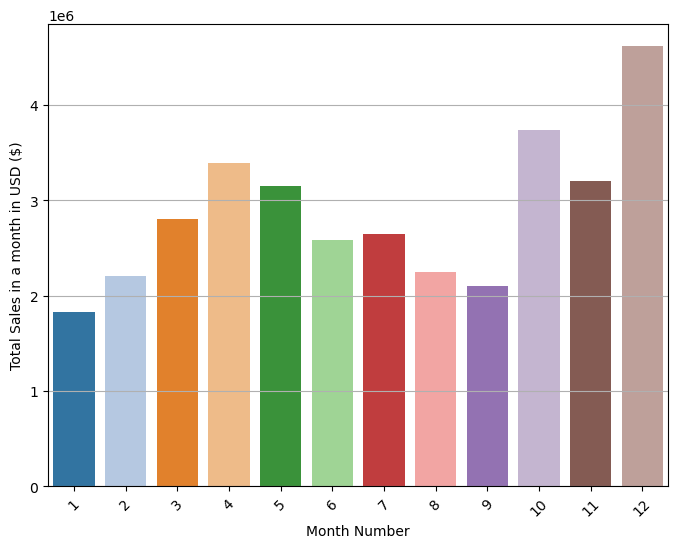

In [114]:
plt.figure(figsize=(8,6))
sns.barplot(x=Total_sales.index,y=Total_sales,hue=Total_sales.index,palette='tab20',legend=False)
plt.xticks(rotation=45)
plt.ylabel('Total Sales in a month in USD ($)')
plt.xlabel('Month Number')
plt.grid(axis='y')
plt.show()

**Thus, the best month in sales was Month 12 with a sale of $4,613,443.34 followed by month 10 and month 4.**

- So, December being the best month in sales followed by October, April and November can be explained by the festivities that are in these months. Generaly in December, shopping spends peak around Christmas and New Year and is closely followed by the festivities in the other months respectively.
- Consumers spend a lot in November (Black Friday) and December (holidays).
  
**In January, they cut back to recover financially which is one of the main reasons for achieving the lowest sales which is  $1822256.73.**

### Question 2: What cities have the highest and lowest sales?

In [115]:
City_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
City_sales

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

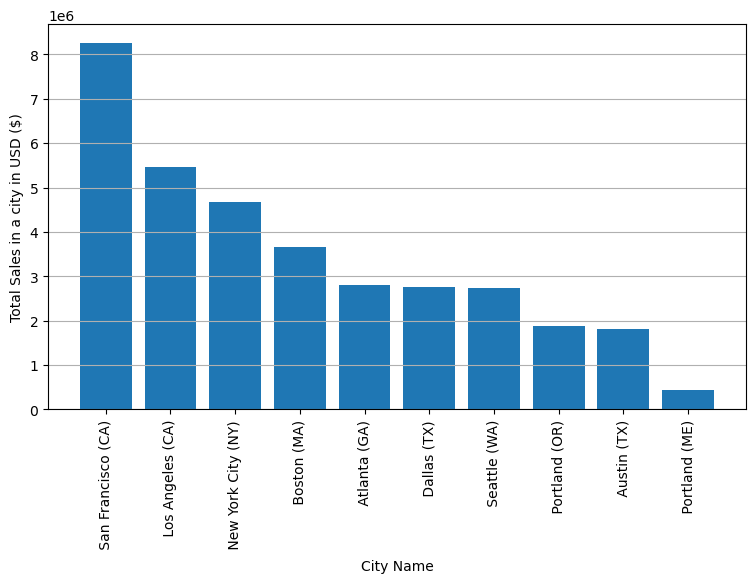

In [20]:
plt.figure(figsize=(9,5))
plt.bar(City_sales.index,City_sales)
plt.xticks( rotation='vertical', size=10)
plt.ylabel('Total Sales in a city in USD ($)')
plt.xlabel('City Name')
plt.grid(axis='y')
plt.show()

**San Francisco and Austin  have the highest and lowest sales respectively** 

### Question 3: What time should we display advertisements to maximize likehood of customers buying products?

In [132]:
Total_hours =df.groupby(['Hour'])['City'].count()
Total_hours

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: City, dtype: int64

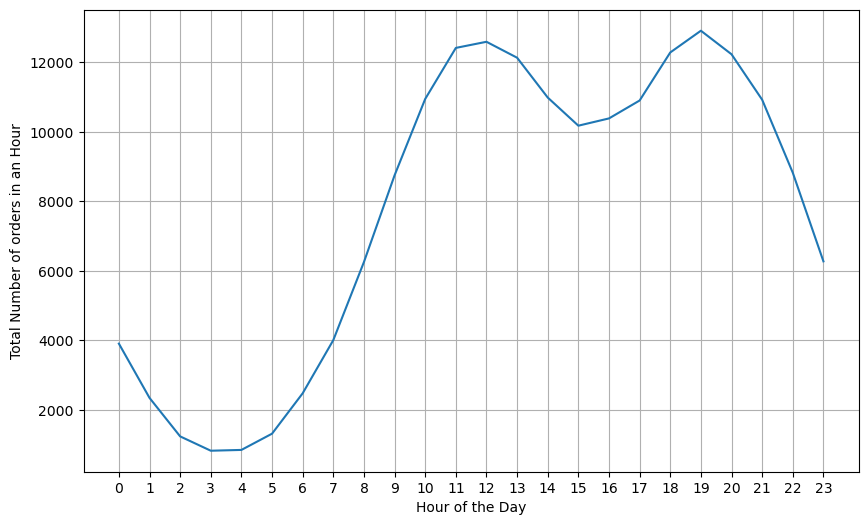

In [133]:
plt.figure(figsize=(10, 6))
#sns.lineplot(data=Total_hours,x='Hour',y='City',hue='State',palette='tab10')

plt.plot(Total_hours.index, Total_hours)
plt.xticks(Total_hours.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of orders in an Hour')
plt.grid()
plt.show()

In [134]:
Total_hours = (pd.DataFrame(df.groupby(['State','Hour'])['City'].count())).reset_index()
Total_hours

,State,Hour,City
0,CA,0,1577
1,CA,1,968
2,CA,2,512
3,CA,3,336
4,CA,4,341
...,...,...,...
187,WA,19,989
188,WA,20,988
189,WA,21,869
190,WA,22,693


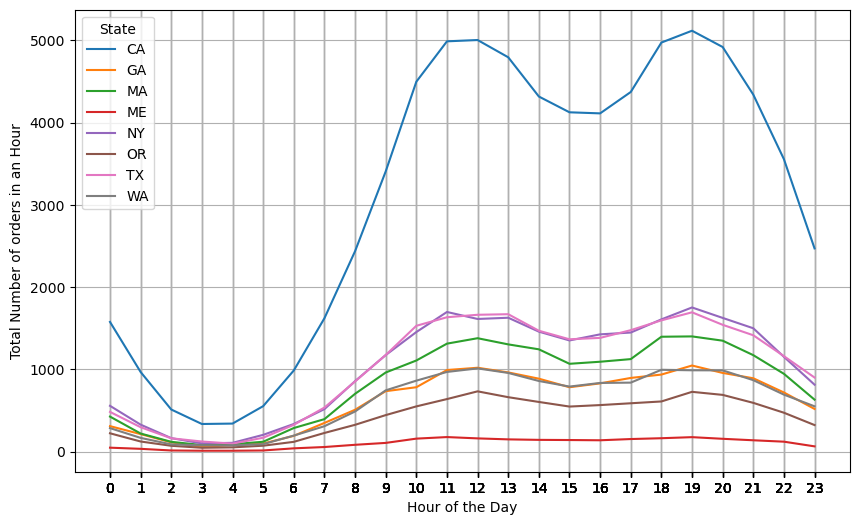

In [127]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Total_hours,x='Hour',y='City',hue='State',palette='tab10')

#plt.plot(Total_hours.index, Total_hours)
plt.xticks(Total_hours.Hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of orders in an Hour')
plt.grid()
plt.show()

From the chart above, it is clear that the peaks in shopping occur around 12 pm (1200 hrs) and 7 pm (1900 hrs) across the entire 8 States. 

**From the graph it is reasonable to recommend from 10:30 Am - 1 PM and 6 PM - 8 PM** 

### Question 4: What products are most often sold together?

In [153]:
df['Order ID'].value_counts().sort_values(ascending=False).head()

Order ID
160873    5
194253    4
178158    4
295681    4
242936    4
Name: count, dtype: int64

In [154]:
df160873 = df[df['Order ID']=='160873']
df160873

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City,State
66347,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,10,10,700.00,San Francisco,CA
66348,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,10,10,14.95,San Francisco,CA
66349,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,10,10,150.00,San Francisco,CA
66350,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,10,10,11.99,San Francisco,CA
66351,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,10,10,600.00,San Francisco,CA


**Here, by carefully observing the data, we can say that if the Order ID of two or more rows match, the corresponding Products were sold together. For example, we have 5 rows with Order Id 160873 which means those 5 products were sold together.**

In [155]:
# Keeping only the ones which have duplicated Order ID
df_duplicated = df[df['Order ID'].duplicated(keep=False)]

# Joining all the Products with same Order ID by ',' and storing in 'Grouped' column
df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_duplicated.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City,State,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,600.00,Los Angeles,CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,11.99,Los Angeles,CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,19,600.00,Los Angeles,CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,19,11.95,Los Angeles,CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,7,11,99.99,Boston,MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [157]:
df_duplicated[df_duplicated.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City,State,Grouped


In [162]:
# Take only the Order ID and Grouped columns and drop duplicates
df_duplicated = df_duplicated[['Order ID', 'Grouped']].drop_duplicates()
df_duplicated.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


Now we can count number of occurences of the combinations.

In [163]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_duplicated['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**iPhone and Lightning Charging Cable are sold together the most, 1005 times.**

### For more than 3,4,5 items taken at a time

In [165]:
from itertools import combinations
from collections import Counter

for comb in range(3, 6):
    count = Counter()
    print(f"\nTaking {comb} items at a time:")
    for row in df_duplicated['Grouped']:
        row_list = row.split(',')
        count.update(Counter(combinations(row_list, comb)))
    
    for key, value in count.most_common(10):
        print(key, value)


Taking 3 items at a time:
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5

Taking 4 items at a time:
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphon

### Question 5: What product sold the most? Why do you think it sold the most?

In [192]:
quantity_ordered=df.groupby('Product')['Quantity Ordered'].sum().sort_values()
quantity_ordered

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int32

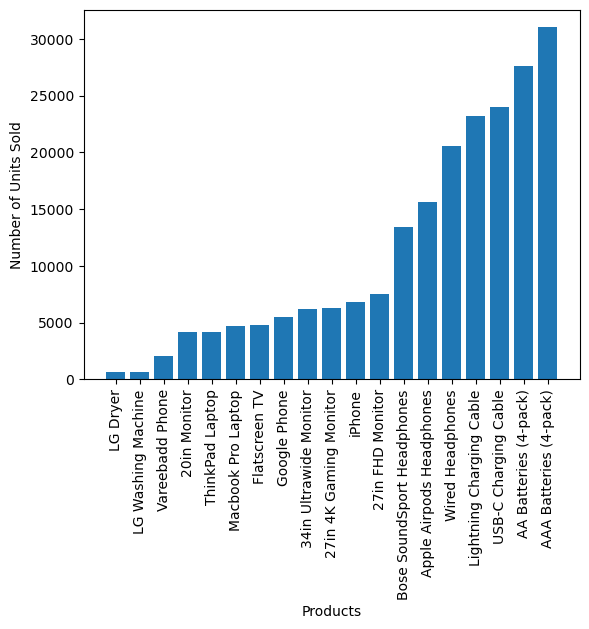

In [193]:
products = quantity_ordered.index

plt.bar(quantity_ordered.index, quantity_ordered)
plt.xticks( rotation='vertical', size=10)
plt.ylabel('Number of Units Sold')
plt.xlabel('Products')
plt.show()

We can say that AAA Batteries (4-pack) were the most. This may be because the per unit price of this item is lowest. Let's see if we are correct!

In [194]:
prices = df.groupby('Product')['Price Each'].mean().sort_values()
prices

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

In [196]:
quantity_ordered=df.groupby('Product')['Quantity Ordered'].sum()
prices = df.groupby('Product')['Price Each'].mean()
products = quantity_ordered.index

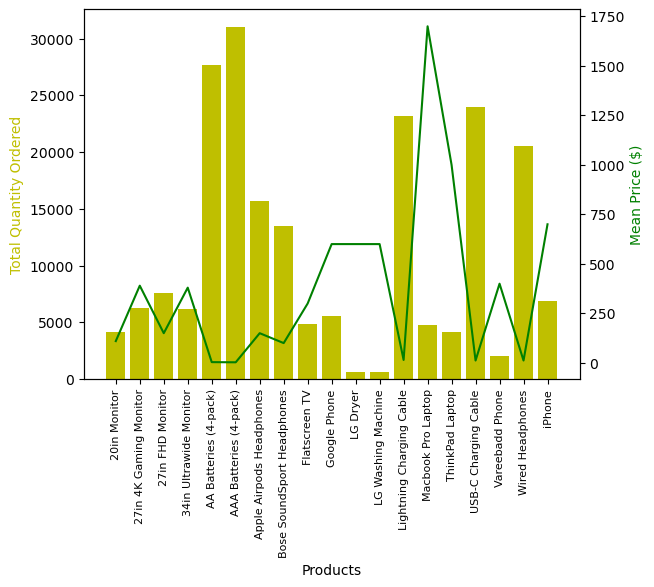

In [197]:
#plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='y')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_ylabel('Total Quantity Ordered', color='y')
ax1.set_xlabel('Products')

ax2.plot(products, prices, color='g')
ax2.set_ylabel('Mean Price ($)', color='g')
plt.show()

So, we see an inverse correlation in the Quantity Ordered and Mean Prices. There are some inconsistencies such as Macbook Pro Laptop as greater price than LG Dryer but still Quantity Ordered is more for Mackbook Pro Laptop than for LG Dryer. This may be because demand is more for Macbook Pro Laptop than for LG Dryer.

In [198]:
prices = df.groupby('Product').agg({'Price Each':'mean','Quantity Ordered':'sum'}).sort_values('Price Each')
prices

,Price Each,Quantity Ordered
Product,,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Wired Headphones,11.99,20557
Lightning Charging Cable,14.95,23217
Bose SoundSport Headphones,99.99,13457
20in Monitor,109.99,4129
27in FHD Monitor,149.99,7550
Apple Airpods Headphones,150.00,15661


In [199]:
prices['Price Each'].corr(prices['Quantity Ordered'])

-0.6014430559934549